In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # setting chart style



In [4]:
# load into dataframe

df1 = pd.read_csv('data/dvi-a2-ps10-data1.csv')
df2 = pd.read_csv('data/dvi-a2-ps10-data2.csv')


In [5]:
df1.shape

(150460, 21)

In [6]:
df2.shape

(636, 18)

In [10]:
df1.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [11]:
df1.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [12]:
df2.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [13]:
df1=df1.fillna(0)
df2=df2.fillna(0)

In [15]:
df1.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed    False
dismissal_kind      False
fielder             False
dtype: bool

In [16]:
df2.isnull().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
umpire3            False
dtype: bool

In [18]:
# query 1 - display an overview - the participating teams and the unique venues used
# for the matches and the number of matches played in each venue

teams = df2['team1'].unique()
venues = df2['venue'].unique()

In [20]:
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [21]:
venues

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [23]:
df = pd.merge(df1,df2[{'id','season'}],left_on='match_id',right_on='id')

/tmp/ipykernel_88992/2120711944.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = pd.merge(df1,df2[{'id','season'}],left_on='match_id',right_on='id')


In [25]:
unique_matches = df.match_id.unique()

In [28]:
print('Unique teams from the 2008-2017 seasons', teams)
print('\nUnique venues from the 2008-2017 seasons', venues)
print('\nNumber of matches played from the 2008-2017 seasons', len(unique_matches))


Unique teams from the 2008-2017 seasons ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']

Unique venues from the 2008-2017 seasons ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel S

In [29]:
# Query 2 - top 10 batsmen by considering how the players score runs in the matches

players=df1.batsman.unique()
# players

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [33]:
class batsman:
    batsman_df=pd.DataFrame(columns=['player name','total runs','balls played','times dismissed','average runs','strike rate'])

    def __init__(self,players,deliveries_df):
        self.players=players
        self.df=deliveries_df.copy()

    def create_df(self):
        for player in self.players:
            runs=int(self.df[self.df['batsman']==player].batsman_runs.sum())
            balls=int((self.df['batsman']==player).sum())
            dismissed=int((self.df['player_dismissed']==player).sum())
            try:
                average=runs/dismissed
            except:
                average=0
            try:
                strike_rate=(runs*100)/balls
            except:
                strike_rate=0
            df_={
                'player name':player,
                'total runs':runs,
                'balls played':balls,
                'times dismissed':dismissed,
                'average runs':average,
                'strike rate':strike_rate
            }
            self.batsman_df=self.batsman_df.append(df_,ignore_index=True)
        return self.batsman_df

In [38]:
import warnings
warnings.filterwarnings('ignore')

batsman_df=batsman(players,df1).create_df()

In [39]:
batsman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player name      461 non-null    object 
 1   total runs       461 non-null    object 
 2   balls played     461 non-null    object 
 3   times dismissed  461 non-null    object 
 4   average runs     461 non-null    float64
 5   strike rate      461 non-null    float64
dtypes: float64(2), object(4)
memory usage: 21.7+ KB


In [40]:
batsman_df=batsman_df.astype({'total runs':'int64','balls played':'int64','times dismissed':'int64'})


In [47]:
# top 10 batsmen by total runs in the matches

highest_runs=batsman_df.sort_values(by='total runs',ascending=False).head(25)
highest_runs

,player name,total runs,balls played,times dismissed,average runs,strike rate
33,SK Raina,4548,3369,134,33.940299,134.995548
87,V Kohli,4423,3494,118,37.483051,126.588437
19,RG Sharma,4207,3274,129,32.612403,128.497251
36,G Gambhir,4132,3433,131,31.541985,120.361200
0,DA Warner,4014,2902,100,40.140000,138.318401
64,RV Uthappa,3778,2960,128,29.515625,127.635135
6,CH Gayle,3651,2532,89,41.022472,144.194313
1,S Dhawan,3561,3005,109,32.669725,118.502496
30,MS Dhoni,3560,2680,94,37.872340,132.835821
71,AB de Villiers,3486,2402,91,38.307692,145.129059


<AxesSubplot:title={'center':'Top 10 Batsmen by Total Runs'}, xlabel='total runs', ylabel='player name'>

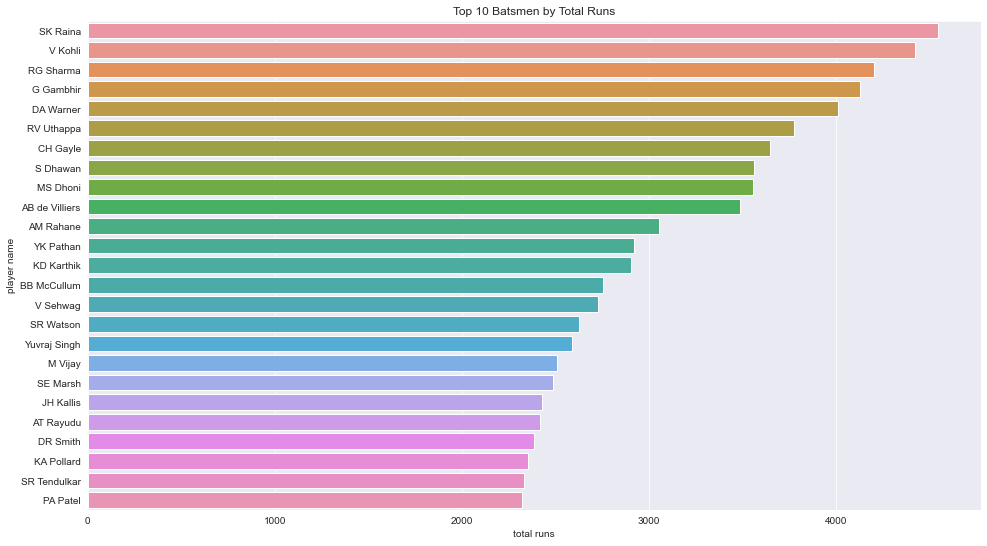

In [48]:
plt.figure(figsize=(16,9))
plt.title('Top 10 Batsmen by Total Runs')
sns.barplot(x='total runs',y='player name',data=highest_runs)

In [57]:
# top ten batsmen by strike rate in the matches
avg_runs=batsman_df.sort_values(by='average runs',ascending=False).head(25)
avg_runs
# best = avg_runs.sort_values(by='strike rate',ascending=False).head(25)
# plt.figure(figsize=(16,9))
# plt.title('Top 10 Batsmen by Strike Rate')
# sns.barplot(x='strike rate',y='player name',data=best)
# sns.barplot(x='avg runs',y='player name',data=avg_runs)

,player name,total runs,balls played,times dismissed,average runs,strike rate
281,MN van Wyk,167,135,3,55.666667,123.703704
81,V Shankar,101,77,2,50.500000,131.168831
444,J Suchith,48,33,1,48.000000,145.454545
326,AC Voges,181,143,4,45.250000,126.573427
40,HM Amla,577,418,13,44.384615,138.038278
47,Iqbal Abdulla,88,86,2,44.000000,102.325581
6,CH Gayle,3651,2532,89,41.022472,144.194313
334,PD Collingwood,203,159,5,40.600000,127.672956
0,DA Warner,4014,2902,100,40.140000,138.318401
132,LMP Simmons,1079,878,27,39.962963,122.892938


In [61]:
# query 3 - to find the % of match winners based on the toss won or lost. Perform match winning analysis based on toss winners

df2.team1.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevels':'Delhi Capitals'},inplace=True)
df2.team2.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevels':'Delhi Capitals'},inplace=True)
df2.winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant','Delhi Daredevels':'Delhi Capitals'},inplace=True)

In [66]:
# does winning toss play a roll in winning the match?
# We need to compare how many teams have won after winning the toss and how many teams have lost after winning the toss

won = 0
lost = 0

for i in df2.index:
    if df2['toss_winner'][i]==df2['winner'][i]:
        won+=1
    else:
        lost+=1
# won

In [67]:
print('\nNumber of matches won by teams after winning the toss', won)
print('\nNumber of matches lost by teams after winning the toss', lost)


Number of matches won by teams after winning the toss 322

Number of matches lost by teams after winning the toss 314


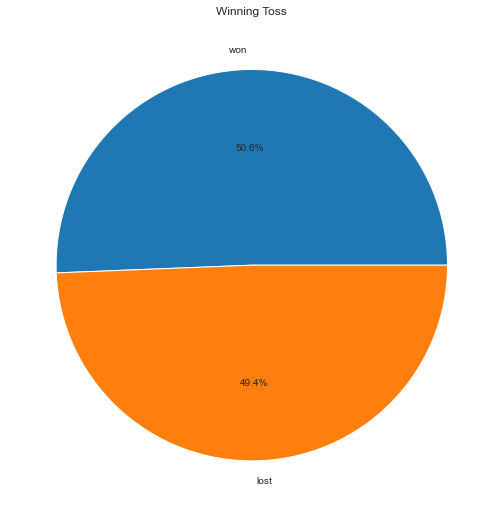

In [73]:
plt.figure(figsize=(16,9))
plt.title('Winning Toss')
plt.pie((won,lost),labels=['won','lost'],autopct='%1.1f%%')
plt.show()